<div dir="RTL">
בתחילת קובץ jupyter notebook עליכם להעלות את כל החבילות השימושיות.
כמו כן אם אתם רוצים לקבל הדפסה יפה של פלט ושל גרפים יש להוסיף שתי פקודות נוספות

In [2]:
import sympy as sp
sp.init_printing()

In [3]:
%matplotlib -- inline
#from sympy.plotting import plot

<div dir="RTL">
הדפסה יפה

In [4]:
#????

<div dir="RTL">
הגדרת משתנים סימבוליים

In [5]:
x, y, z, t = sp.symbols('x y z t')
alpha,beta,gamma=sp.symbols('alpha,beta,gamma')

<div dir="RTL">
פעולות מתמטיות

In [6]:
sp.sqrt(2), sp.pi/2, sp.sin(sp.pi/2)

<div dir="RTL">
מספר אוילר והפוקנציה האקספוננציאלית

In [7]:
sp.exp(1), sp.exp(x)

<div dir='RTL'>
הגדרת פונקציה, וגזירת הפונקציה לפי המשתנה t.
ניתן לגזור את הפונקציה גם על פי המשתנה $\tau$.

In [8]:
tau = sp.symbols('tau')
decay = sp.exp(-t/tau)
decay_dt = decay.diff(t)
decay, decay_dt

<div dir='RTL'>
פעולות שניתן לבצע על פונקציה.
הצבת ערך בפרמטרים ובמשתנים (שימו לב: האבחנה בין פרמטרים למשתנים היא מלאכותית. כולם שווים בפני sympy.)
    
אפשר למצוא פרוט של הפעולות הביסיסות ברשת. למשל כאן:
http://docs.sympy.org/latest/tutorial/basic_operations.html

In [9]:
decay.subs({tau:5})

In [10]:
decay.subs({t:2,tau:5})

In [11]:
decay.subs({t:2,tau:5}).evalf()

In [12]:
f1 = (x+2)**2
f1.expand()

<div dir='RTL'>
כלי נוסף שיש להשתמש בו בזהירות הוא simply. זהו אלגוריתם מאוד כללי ולכן כבד מבחינה חישובית, ויכול לתת תוצאות בלתי צפויות.
בשימוש בכלי הזה אתם נותנים למחשב להחליט מהי הצורה הפשוטה ביותר של ביטוי. לא תמיד תסכימו איתו.

לרוב כדאי לחשוב קודם איזה סוג של פעולה תעזור לכם לקבל את הביטוי הפשוט ביותר בו אתם מעוניינים. לרוב הפעולות האלו יש פקודות ספציפיות. אם אתם יודעים מה הפעולה הדרושה, עדיף להשתמש בה ישירות.

קיראו על כך בקישור המצורף

http://docs.sympy.org/latest/tutorial/simplification.html

In [13]:
f2 = sp.sin(x)**2+sp.cos(x)**2
f2.simplify()

In [14]:
f3 = x**2+2*x+1
f3.simplify()

In [15]:
f3.factor()

<div dir='RTL'>
אפשר להפוך פונקציה סימבולית לפונקציה פייטון נומרית רגילה. אתם יכולים כמה משתנים הפונקציה תקבל, אבל תדאגו להגדיר אותה היטב. לא להשאיר משתנים ללא ערך מספרי..

In [16]:
#t is input, tau=5 is a constant
f_num1 = sp.lambdify(t,decay.subs({tau:5}))
f_num2 = sp.lambdify([t,tau],decay)
help(f_num1)
help(f_num2)

Help on function <lambda> in module numpy:

<lambda> lambda _Dummy_140
    Created with lambdify. Signature:
    
    func(t)
    
    Expression:
    
    exp(-t/5)

Help on function <lambda> in module numpy:

<lambda> lambda _Dummy_141, _Dummy_142
    Created with lambdify. Signature:
    
    func(t, tau)
    
    Expression:
    
    exp(-t/tau)



In [17]:
f_num1(1), f_num2(1,5)

<div dir='RTL'>
# יצירת גרף

כך נראית פונקציית הדעיכה האקספוננציאלית. המשתנה t מתאר את הזמן - זהו המשתנה הבלתי תלוי של הפונקציה.
הפרמטר $\tau$ מייצג את זמן הגעיה האופייני. זהו הזמן הנדרש לגודל הנמדד לקטון פי $e$.

$$\mbox{decay}(t=\tau) = e^{-\tau/\tau}=e^{-1} = 1/e$$

פונקציית הדיעכה מופיעה בתופעות רבות, בהן גודל כלשהו קטן בקצב משתנה התלוי בכמות החומר ברגע נתון.  

על סמך הגרפים, עבור איזה ערך של $\tau$ פונקציית הדעיכה יורדת מהר יותר
ל-0
?

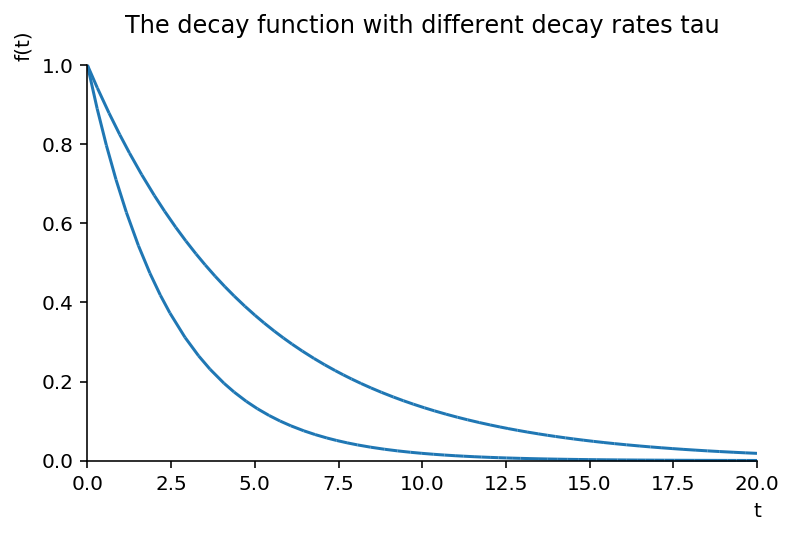

In [18]:
title = 'The decay function with different decay rates tau'
sp.plot(decay.subs({tau:5}),decay.subs({tau:2.5}),(t,0,20),title=title)


<div dir='RTL'>    
היכולת לשלוט בגרף דרך החבילה של sympy מוגבלת למדי.
אם תירצו לקבל גרף יותר מושקע השתמשו ב-matplotlib.

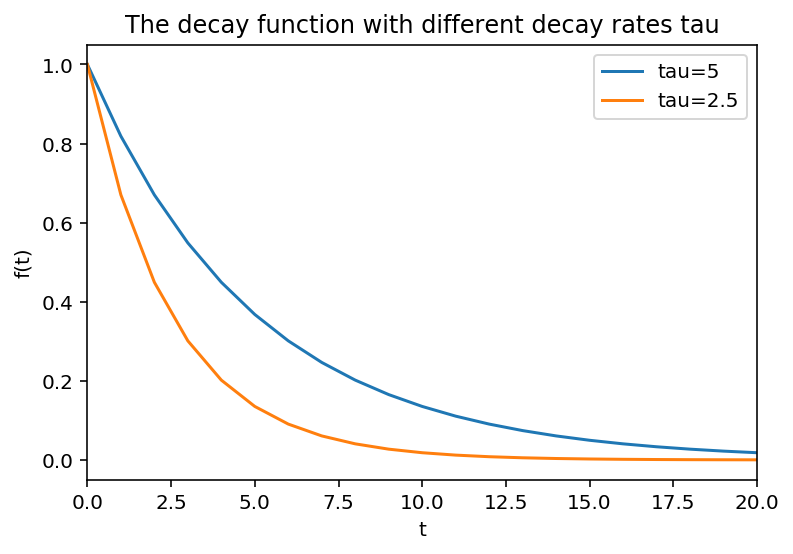

In [19]:
import matplotlib.pyplot as plt
x_axis = range(0,21)
y_axis1 = [decay.subs({tau:5,t:t_i}) for t_i in x_axis]
y_axis2 = [decay.subs({tau:2.5,t:t_i}) for t_i in x_axis]
plt.plot(x_axis,y_axis1)
plt.plot(x_axis,y_axis2)
plt.xlim(0,20)
plt.legend(['tau=5','tau=2.5'])
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title(title)

<div dir='RTL'>
# משוואות
אפשר ליצור משוואה סימבולית
    


In [30]:
eq1 = sp.Eq(x**2+alpha**2,2*alpha)
eq1

<div dir='RTL'>
ולמצוא את הפתרונות שלה

In [31]:
sp.solve(eq1,x)

<div dir='RTL'>
אפשר ליצור מערכת משוואות
ולפתור גם אותן

In [33]:
eq2 = []
eq2.append(sp.Eq(y,beta*x))
eq2.append(sp.Eq(y**2+x**2,1))

eq2

In [34]:
sp.solve(eq2,[x,y])

<div dir='RTL'>
קיימות משוואות שאין להן פתרון אנליטי. כדי לפתור משוואות אלה יש לחפש פתרונות נומריים.
    
לפני שמנסים לפתור את המשוואה נומרית יש לבדוק גרפית עם הפתרון קיים ומה יהיה ערכו בערך.

הפתרון שיתקבל יהיה מספרי, ולכן חשוב לדאוג להציב ערכים מספריים בכל הפרמטרים.

נשתמש בפונקציה (
sp.nsolve(eq,x,x0

<b>fun</b> - המשוואה או מערכת המשוואות

<b>x</b> -  המשתנה עבורו פותרים

<b>x0</b> - ניחוש התחלתי עבור הפתרון


<b>שימו לב:</b>
פתרון נומרי לא יעבוד טוב אם לא ניתן ניחוש התחלתי ולשם כך חשוב להסתכל על הגרף.

בדוגמה למטה רואים שיש שני פתרונות למשוואה. פתרון אחד הוא הפתרון הטריוויאלי 0. 

הפתרון השני קרוב לערך x=2. כדי לקבל את הפתרון השני נציב x0=2.



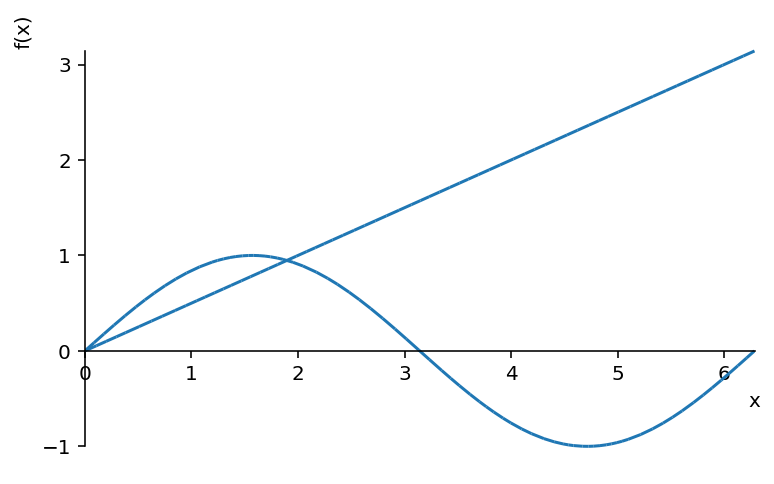

In [55]:
#sp.nsolve(eq3.subs({tau:5}),t)
eq4=sp.Eq(sp.sin(x),x/alpha)
sp.plot(sp.sin(x),(x/alpha).subs({alpha:2}),(x,0,2*sp.pi))


In [62]:
eq4_num = eq4.subs({alpha:2})
eq4_num
sp.nsolve(eq4_num,x,2)